In [1]:
# データ加工・処理・分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

# 小数第3位まで表示
%precision 3

'%.3f'

In [28]:
# その他のライブラリのimport
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
X, _ = make_blobs(random_state=52)

In [4]:
type(X)

numpy.ndarray

In [5]:
X.shape

(100, 2)

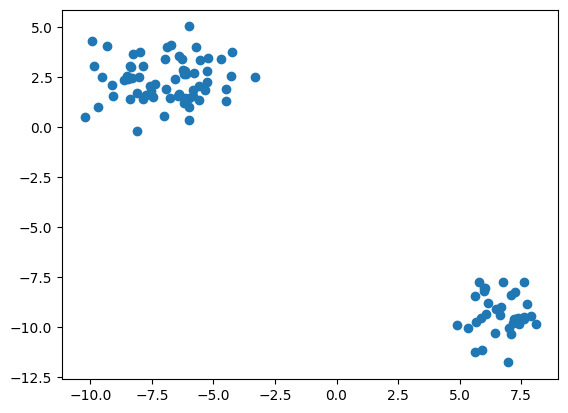

In [6]:
plt.scatter(X[:,0], X[:,1])

In [18]:
kmeans = KMeans(init="random", n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

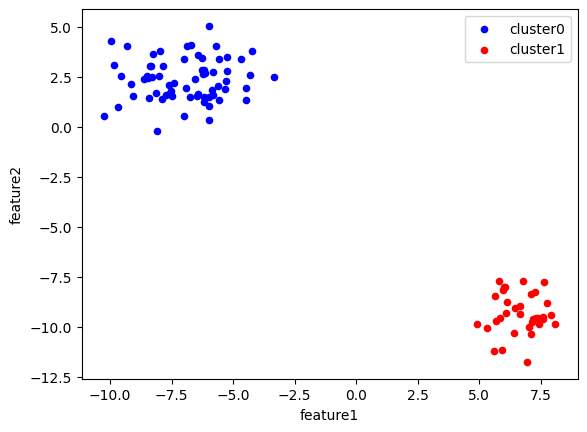

In [19]:
concated = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(y_pred)], axis=1)
concated.columns = ["feature1", "feature2", "cluster"]

ax = None
colors = ["blue", "red"]
for i, data in concated.groupby("cluster"):
    ax = data.plot.scatter(
        x="feature1", y="feature2", color=colors[i], label=f"cluster{i}", ax=ax
    )

In [20]:
# アイリスデータに主成分分析

In [21]:
data = load_iris()

In [23]:
X = data.data
y = data.target

In [27]:
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [29]:
pca = PCA(n_components=2)
pca.fit(X_std)

PCA(n_components=2)

In [30]:
X_pca = pca.transform(X_std)

In [32]:
X_pca.shape

(150, 2)

In [33]:
y.shape

(150,)

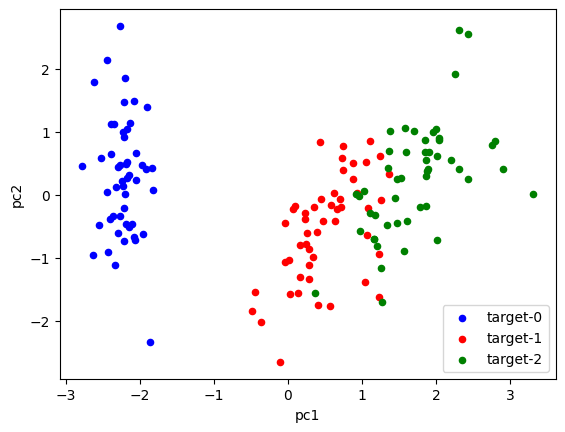

In [38]:
merged_data = pd.concat(
    [pd.DataFrame(X_pca[:,0]), pd.DataFrame(X_pca[:,1]), pd.DataFrame(data.target)], axis=1
)
merged_data.columns = ["pc1", "pc2", "target"]
ax = None
colors = ["blue", "red", "green"]
for i, data in merged_data.groupby("target"):
    ax = data.plot.scatter(
        x="pc1", y="pc2",
        color = colors[i], label=f"target-{i}", ax=ax
    )